<a href="https://www.kaggle.com/gomohit/sales-data-analysis?scriptVersionId=85818378" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-analysis/all_data_copy.xlsx


In [2]:
pip install openpyxl

     |████████████████████████████████| 242 kB 4.5 MB/s            
Note: you may need to restart the kernel to use updated packages.


## Retail Analysis
Dataset Description:

    Instances: 3.73 Lakh
    Features: 6 columns
    Numerical: 4 columns
    Categorical: 2 columns

Attribute Information:


* Order ID: Order identification number for each product
* Product: Product name
* Quantity Ordered: Amount of items
* Price Each: Price of each product per item in dollars
* Order Date: Date of purchase
* Purchase Address: Address of purchase order


Retail Analysis
Dataset Description:
Instances: 3.73 Lakh
Features: 6 columns
Numerical: 4 columns
Categorical: 2 columns

Attribute Information:

Order ID: Order identification number for each product
Product: Product name
Quantity Ordered: Amount of items
Price Each: Price of each product per item in dollars
Order Date: Date of purchase
Purchase Address: Address of purchase order
Questions:

1. Load the dataset into pandas and provide a summary of columns in the loaded dataset without any modification.
2. Prepare the data frame for further analysis. Clean it, mould it in any manner you see fit.
3. Provide a summary of the cleaned dataset along with some preliminary analysis and contrast it with the uncleaned dataset wherever modifications are made.
4. Answer the following questions using the clean dataset by plotting suitable graphs:
    
    What is the distribution of sales among different cities in different months?
    
    Which City had the highest sales overall?
    
    Which Month had the highest amount of sales overall?
    
    Most bought products per city.
    
    
5. Based on your analysis, suggest a city for establishing a new branch for the retail store backed with proper reasoning.
6. Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night) and answer the following for each city:
7. What products are mostly sold at different times of the day?
8. Which time of day has the most sales?
9. Based on your analysis, suggest the best working hours and the best products for the retail stores in each city.
10. Find out the pair of products that are most sold together. 
    For example, generally, we would expect a person who buys an iPhone 11 to also buy the Apple Airpods together with it. Identify such pairs of products and suggest what promotional offers should the retail company come up with based on your outcome.

### Reading Excel File 

In [117]:
df=pd.read_excel('/kaggle/input/retail-analysis/all_data_copy.xlsx', parse_dates=['date'])

ValueError: Missing column provided to 'parse_dates': 'date'

In [4]:
df.head() #first five 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.0,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [5]:
df.tail() #last five 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373695,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
373696,259354.0,iPhone,1.0,700.0,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355.0,iPhone,1.0,700.0,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
373698,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"
373699,259357.0,USB-C Charging Cable,1.0,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016"


In [6]:
df.shape # verified with given detan as same number of row and column in data

(373700, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


only show object type of data need to retify futher.

In [8]:
df.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

simmilar number of null, so we can drop it all togather.

In [41]:
sd=df.copy(deep=True)

In [9]:
duplicate = df[df.duplicated()]
  
print("Duplicate Rows :")
len(duplicate)

Duplicate Rows :


188012

In [10]:
duplicate = df[df.duplicated(keep = 'last')]
  
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.0,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
373398,NaN,NaN,NaN,NaN,NaN,NaN
373413,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373482,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373631,259296.0,Apple Airpods Headphones,1.0,150.0,2019-09-28 16:48:00,"894 6th St, Dallas, TX 75001"


In [11]:
duplicate = df[df.duplicated(['Order ID'])]
  
print("Duplicate Rows based on Name and Age :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows based on Name and Age :


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
42,141275.0,Wired Headphones,1.0,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301"
58,141290.0,AA Batteries (4-pack),3.0,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001"
134,141365.0,Wired Headphones,1.0,11.99,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001"
154,141384.0,USB-C Charging Cable,1.0,11.95,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215"
221,141450.0,Bose SoundSport Headphones,1.0,99.99,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016"
...,...,...,...,...,...,...
373695,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
373696,259354.0,iPhone,1.0,700.0,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355.0,iPhone,1.0,700.0,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
373698,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [12]:
sale=df.copy(deep=True)# making copy of dataframe

In [13]:
sale = sale.astype({"Product":'category',"Order ID":'category'})

In [14]:
sale['Price Each'] = pd.to_numeric(sale['Price Each'], errors='coerce')

In [15]:
sale['Quantity Ordered'] = pd.to_numeric(sale['Quantity Ordered'], errors='coerce')

In [16]:
sale['Order Date'] =  pd.to_datetime(sale['Order Date'],errors ='coerce')

In [268]:
ef.value_counts()

NameError: name 'ef' is not defined

In [17]:
sale.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1800
Price Each          1800
Order Date          1800
Purchase Address    1090
dtype: int64

In [18]:
sale.rename({'Order ID': 'id', 'Quantity Ordered': 'qty','Price Each': 'price', 'Order Date': 'date','Purchase Address': 'address'}, axis=1, inplace=True)

In [19]:
sale['dates'] = pd.to_datetime(sale['date']).dt.date
sale['time'] = pd.to_datetime(sale['date']).dt.time

In [20]:
sale = sale.drop(['date'],axis=1)

In [21]:
sale['dates'] =  pd.to_datetime(sale['dates'],errors ='coerce')

In [22]:
sale['time'] =  pd.to_datetime(sale['time'],errors ='coerce')

In [23]:
sale[['Street', 'City', 'State']] = sale['address'].str.split(',', expand=True)

In [24]:
sale.head()

,id,Product,qty,price,address,dates,time,Street,City,State
0,141234.0,iPhone,1.0,700.00,"944 Walnut St, Boston, MA 02215",2019-01-22,NaT,944 Walnut St,Boston,MA 02215
1,141235.0,Lightning Charging Cable,1.0,14.95,"185 Maple St, Portland, OR 97035",2019-01-28,NaT,185 Maple St,Portland,OR 97035
2,141236.0,Wired Headphones,2.0,11.99,"538 Adams St, San Francisco, CA 94016",2019-01-17,NaT,538 Adams St,San Francisco,CA 94016
3,141237.0,27in FHD Monitor,1.0,149.99,"738 10th St, Los Angeles, CA 90001",2019-01-05,NaT,738 10th St,Los Angeles,CA 90001
4,141238.0,Wired Headphones,1.0,11.99,"387 10th St, Austin, TX 73301",2019-01-25,NaT,387 10th St,Austin,TX 73301


In [25]:
sale1=sale.copy(deep=True)

In [26]:
sale1[['state','zip']]=sale1.State.str.extract('(?P<state>.+?) (?P<zip>.+?\S+)')

In [27]:
sale1 = sale1.drop(['State','address','time'],axis=1)

In [28]:
sale1.head()

,id,Product,qty,price,dates,Street,City,state,zip
0,141234.0,iPhone,1.0,700.00,2019-01-22,944 Walnut St,Boston,MA,02215
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28,185 Maple St,Portland,OR,97035
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17,538 Adams St,San Francisco,CA,94016
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05,738 10th St,Los Angeles,CA,90001
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25,387 10th St,Austin,TX,73301


In [29]:
sale1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   id       372610 non-null  category      
 1   Product  372610 non-null  category      
 2   qty      371900 non-null  float64       
 3   price    371900 non-null  float64       
 4   dates    371900 non-null  datetime64[ns]
 5   Street   372610 non-null  object        
 6   City     371900 non-null  object        
 7   state    371900 non-null  object        
 8   zip      371900 non-null  object        
dtypes: category(2), datetime64[ns](1), float64(2), object(4)
memory usage: 27.1+ MB


In [30]:
sale1['month'] = sale1['dates'].dt.month

In [31]:
sale1['months'] = sale1['dates'].dt.to_period('M')

In [32]:
sale1 = sale1.drop(['months'],axis=1)

In [33]:
sale1 = sale1.drop(['month'],axis=1)

In [34]:
sale1.describe(include='all')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,id,Product,qty,price,dates,Street,City,state,zip
count,372610,372610,371900.000000,371900.000000,371900,372610,371900,371900,371900
unique,178438,20,NaN,NaN,366,46838,9,8,10
top,Order ID,USB-C Charging Cable,NaN,NaN,2019-12-17 00:00:00,Purchase Address,San Francisco,CA,94016
freq,710,43806,NaN,NaN,1762,710,89464,148674,89464
first,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.124383,184.399735,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.442792,332.730883,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,2.990000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000,11.950000,NaN,NaN,NaN,NaN,NaN


What is the distribution of sales among different cities in different months?

In [35]:
sale1['yyyy'] = pd.to_datetime(sale1['dates']).dt.strftime('%Y')#final for separate month
sale1['mm'] = pd.to_datetime(sale1['dates']).dt.strftime('%m')

In [36]:
sale1['sales']=sale1['price']*sale1['qty']

In [37]:
sale1.head()

,id,Product,qty,price,dates,Street,City,state,zip,yyyy,mm,sales
0,141234.0,iPhone,1.0,700.00,2019-01-22,944 Walnut St,Boston,MA,02215,2019,01,700.00
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28,185 Maple St,Portland,OR,97035,2019,01,14.95
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17,538 Adams St,San Francisco,CA,94016,2019,01,23.98
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05,738 10th St,Los Angeles,CA,90001,2019,01,149.99
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25,387 10th St,Austin,TX,73301,2019,01,11.99


In [38]:
sale1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   id       372610 non-null  category      
 1   Product  372610 non-null  category      
 2   qty      371900 non-null  float64       
 3   price    371900 non-null  float64       
 4   dates    371900 non-null  datetime64[ns]
 5   Street   372610 non-null  object        
 6   City     371900 non-null  object        
 7   state    371900 non-null  object        
 8   zip      371900 non-null  object        
 9   yyyy     371900 non-null  object        
 10  mm       371900 non-null  object        
 11  sales    371900 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(3), object(6)
memory usage: 35.7+ MB


In [39]:
sale1.City.value_counts()

 San Francisco    89464
 Los Angeles      59210
 New York City    49752
 Boston           39868
 Atlanta          29762
 Dallas           29640
 Seattle          29464
 Portland         24930
 Austin           19810
Name: City, dtype: int64

In [40]:
s_c_gp['Product'].count()

NameError: name 's_c_gp' is not defined

In [ ]:
p_c_gp =sale1.groupby(['City','Product'],sort = False)

In [ ]:
p1_c_gp =sale1.groupby(['Product','qty'],sort = False)

In [ ]:
p1_c_gp['City'].sum()

In [ ]:
x23=p_c_gp['qty'].max()

In [ ]:
x23.head(50)

In [ ]:
m_c_gp =sale1.groupby(['mm'],sort = False)

In [ ]:
s_c_gp =sale1.groupby(['City'],sort = False)

In [ ]:
m_c_gp['sales'].sum().nlargest()

In [ ]:
m_c_gp['sales'].sum().nlargest().plot(kind='pie')

In [ ]:
s_c_gp['sales'].sum().nlargest()

In [ ]:
s_c_gp['sales'].sum().nlargest().plot(kind='pie')

In [ ]:
x

In [ ]:
sale,month,city

In [ ]:
import seaborn as sns

In [ ]:
x.plot(kind='bar',figsize=(30, 10))

In [ ]:
%pylab inline
import matplotlib as mpl

In [ ]:
mpl.rc("figure", figsize=(45, 10))
sns.catplot(y='sales', x='mm', col='City',col_wrap=3 ,data=sale1, kind='bar')

In [161]:
er=df.copy(deep=True)

In [140]:
ner=er[er.isna().any(axis=1)]

In [143]:
ner

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234.0,iPhone,1.0,700.0,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",NaN
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",NaN
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",NaN
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",NaN
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",NaN
...,...,...,...,...,...,...,...
373695,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",NaN
373696,259354.0,iPhone,1.0,700.0,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",NaN
373697,259355.0,iPhone,1.0,700.0,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",NaN
373698,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",NaN


In [162]:
er = er.dropna(how='all')

In [270]:
er['City'].value_counts()

 San Francisco    89464
 Los Angeles      59210
 New York City    49752
 Boston           39868
 Atlanta          29762
 Dallas           29640
 Seattle          29464
 Portland         24930
 Austin           19810
Name: City, dtype: int64

In [166]:
er.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371900 entries, 0 to 373699
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          371900 non-null  object
 1   Product           371900 non-null  object
 2   Quantity Ordered  371900 non-null  object
 3   Price Each        371900 non-null  object
 4   Order Date        371900 non-null  object
 5   Purchase Address  371900 non-null  object
 6   Month             2 non-null       object
dtypes: object(7)
memory usage: 22.7+ MB


In [164]:
er=er[er['Order Date'].astype(str).str[0:2]!='Or']

In [170]:
#er=er[er['Order Date'].str[0:2]!='Or']
# jk.head()
er['Month']=er['Order Date'].astype(str).str[5:7]
er['Month']=er['Month'].astype('int32')
er.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234.0,iPhone,1.0,700.0,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1


In [173]:
er['Price Each'] = pd.to_numeric(er['Price Each'], errors='coerce')
er['Quantity Ordered'] = pd.to_numeric(er['Quantity Ordered'], errors='coerce')
er['sales']=er['Price Each']*er['Quantity Ordered']

In [181]:
results = er.groupby('Month').sum()

In [177]:
import matplotlib.pyplot as plt

In [186]:
months=range(1,13)

<BarContainer object of 12 artists>

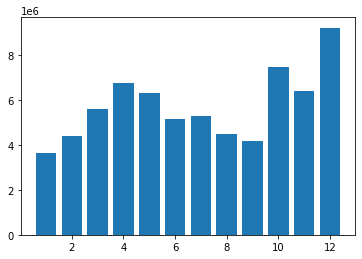

In [187]:

plt.bar(months,results['sales'])

In [ ]:
er['Order Date']

In [189]:
 er['O_D_T']=pd.to_datetime(er['Order Date'])

In [191]:
er['Hour']=er['O_D_T'].dt.hour

In [266]:

er.groupby('Hour')['Product'].unique()

Hour
0     [AA Batteries (4-pack), USB-C Charging Cable, ...
1     [USB-C Charging Cable, iPhone, AA Batteries (4...
2     [USB-C Charging Cable, AAA Batteries (4-pack),...
3     [Google Phone, Lightning Charging Cable, USB-C...
4     [AAA Batteries (4-pack), 27in FHD Monitor, 27i...
5     [Lightning Charging Cable, Wired Headphones, B...
6     [Wired Headphones, Apple Airpods Headphones, 2...
7     [AAA Batteries (4-pack), AA Batteries (4-pack)...
8     [Apple Airpods Headphones, Bose SoundSport Hea...
9     [USB-C Charging Cable, Apple Airpods Headphone...
10    [Bose SoundSport Headphones, Macbook Pro Lapto...
11    [Wired Headphones, Apple Airpods Headphones, V...
12    [27in 4K Gaming Monitor, USB-C Charging Cable,...
13    [Wired Headphones, AAA Batteries (4-pack), Lig...
14    [Lightning Charging Cable, AAA Batteries (4-pa...
15    [Lightning Charging Cable, Bose SoundSport Hea...
16    [Apple Airpods Headphones, USB-C Charging Cabl...
17    [27in FHD Monitor, AAA Batteries (4-p

<AxesSubplot:xlabel='Hour'>

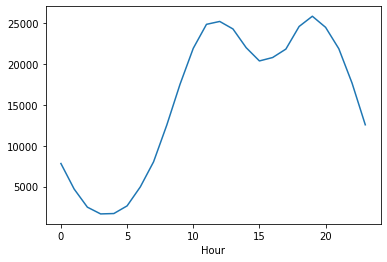

In [198]:
result1=er.groupby(er['Hour'])['Quantity Ordered'].count().plot()
result1

In [218]:
er

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,O_D_T,Hour
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,2019-01-22 21:25:00,21
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,2019-01-28 14:15:00,14
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,2019-01-17 13:33:00,13
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,2019-01-05 20:33:00,20
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,2019-01-25 11:59:00,11
...,...,...,...,...,...,...,...,...,...,...
373695,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,2019-09-17 20:56:00,20
373696,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,2019-09-01 16:00:00,16
373697,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,2019-09-23 07:39:00,7
373698,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,2019-09-19 17:30:00,17


In [217]:
ner = er[er['Order ID'].duplicated(keep=False)]
ner

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,O_D_T,Hour
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,2019-01-22 21:25:00,21
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,2019-01-28 14:15:00,14
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,2019-01-17 13:33:00,13
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,2019-01-05 20:33:00,20
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,2019-01-25 11:59:00,11
...,...,...,...,...,...,...,...,...,...,...
373695,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,2019-09-17 20:56:00,20
373696,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,2019-09-01 16:00:00,16
373697,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,2019-09-23 07:39:00,7
373698,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,2019-09-19 17:30:00,17


In [192]:
er.head(-50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,O_D_T,Hour
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,2019-01-22 21:25:00,21
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,2019-01-28 14:15:00,14
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,2019-01-17 13:33:00,13
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,2019-01-05 20:33:00,20
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,2019-01-25 11:59:00,11
...,...,...,...,...,...,...,...,...,...,...
373644,259305.0,AA Batteries (4-pack),1.0,3.84,2019-09-24 20:46:00,"47 North St, New York City, NY 10001",9,3.84,2019-09-24 20:46:00,20
373645,259306.0,Apple Airpods Headphones,1.0,150.00,2019-09-02 06:40:00,"962 13th St, New York City, NY 10001",9,150.00,2019-09-02 06:40:00,6
373646,259307.0,27in FHD Monitor,1.0,149.99,2019-09-14 16:06:00,"172 Washington St, Los Angeles, CA 90001",9,149.99,2019-09-14 16:06:00,16
373647,259308.0,Macbook Pro Laptop,1.0,1700.00,2019-09-26 19:16:00,"912 8th St, Boston, MA 02215",9,1700.00,2019-09-26 19:16:00,19


In [ ]:
df

In [133]:
ner

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales


In [121]:
 er['Order Date']=pd.to_datetime(er['Order Date'],errors ='coerce')

In [ ]:
sd['Price Each'] = pd.to_numeric(sd['Price Each'], errors='coerce')

In [126]:
er['Price Each'] = pd.to_numeric(er['Price Each'], errors='coerce')
er['Quantity Ordered'] = pd.to_numeric(er['Quantity Ordered'], errors='coerce')
er['sales']=er['Price Each']*er['Quantity Ordered']

In [ ]:
er['Year'] = ['Order Date'].index.year
er['Month'] = ['Order Date'].index.month
er['Weekday Name'] = ['Order Date'].index.weekday_name

In [255]:
er[['Street', 'City', 'State']] = er['Purchase Address'].str.split(',', expand=True)

In [256]:
er.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371900 entries, 0 to 373699
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          371900 non-null  object        
 1   Product           371900 non-null  object        
 2   Quantity Ordered  371900 non-null  float64       
 3   Price Each        371900 non-null  float64       
 4   Order Date        371900 non-null  object        
 5   Purchase Address  371900 non-null  object        
 6   Month             371900 non-null  int32         
 7   sales             371900 non-null  float64       
 8   O_D_T             371900 non-null  datetime64[ns]
 9   Hour              371900 non-null  int64         
 10  Street            371900 non-null  object        
 11  City              371900 non-null  object        
 12  State             371900 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), objec

In [242]:
products = df[['Product','Order ID']].copy()

In [244]:
products = products.set_index('Order ID')# Convert to Series for eve easier lookups


In [249]:
 pip install mlxtend 

Note: you may need to restart the kernel to use updated packages.


In [253]:
from mlxtend.frequent_patterns import apriori, association_rules

<function mlxtend.frequent_patterns.association_rules.association_rules(df, metric='confidence', min_threshold=0.8, support_only=False)>

In [254]:
import apriori

ModuleNotFoundError: No module named 'apriori'

In [246]:
products = products.reset_index()

In [247]:
from mlxtend.preprocessing import TransactionEncoder as te
# fit the TransactionEncoder
te.fit(products['Order ID'])
# do the transformation
orders_1hot = transform(products['Order ID'])

TypeError: fit() missing 1 required positional argument: 'X'

In [237]:
products

,Product
Order ID,
141234.0,iPhone
141235.0,Lightning Charging Cable
141236.0,Wired Headphones
141237.0,27in FHD Monitor
141238.0,Wired Headphones
...,...
259353.0,AAA Batteries (4-pack)
259354.0,iPhone
259355.0,iPhone


In [42]:
sd.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.0,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [48]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


In [50]:
sd['Order Date'] = pd.to_datetime(sd['Order Date'],errors ='coerce') 

In [56]:
sd['Date']=sd['Order Date'].dt.date

In [54]:
sd['Order Date'].dt.time

0         21:25:00
1         14:15:00
2         13:33:00
3         20:33:00
4         11:59:00
            ...   
373695    20:56:00
373696    16:00:00
373697    07:39:00
373698    17:30:00
373699    00:18:00
Name: Order Date, Length: 373700, dtype: object


In [57]:
sd['time']=sd['Order Date'].dt.strftime('%H:%M')

In [59]:
sd[['Street', 'City', 'State']] = sd['Purchase Address'].str.split(',', expand=True)

In [60]:
sd[['state','zip']]=sd.State.str.extract('(?P<state>.+?) (?P<zip>.+?\S+)')

In [62]:
sd = sd.drop(['Order Date','Purchase Address','Street','State','zip'],axis=1)

In [66]:
sd['year'] = pd.to_datetime(sd['Date']).dt.strftime('%Y')#final for separate month
sd['month'] = pd.to_datetime(sd['Date']).dt.strftime('%m')

In [74]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Order ID          372610 non-null  object  
 1   Product           372610 non-null  category
 2   Quantity Ordered  372610 non-null  object  
 3   Price Each        372610 non-null  object  
 4   Date              371900 non-null  object  
 5   time              371900 non-null  object  
 6   City              371900 non-null  object  
 7   state             371900 non-null  object  
 8   year              371900 non-null  object  
 9   month             371900 non-null  object  
dtypes: category(1), object(9)
memory usage: 26.0+ MB


In [75]:
sd = sd.astype({"Product":'category',"Quantity Ordered":'float','Price Each':'float'},errors ='ignore')

In [77]:
sd['Price Each'] = pd.to_numeric(sd['Price Each'], errors='coerce')

In [78]:
sd['Quantity Ordered'] = pd.to_numeric(sd['Quantity Ordered'], errors='coerce')

In [79]:
sd['sales']=sd['Price Each']*sd['Quantity Ordered']

In [90]:
sd=sd.reset_index()

In [102]:
sd.head().round()

,Order ID,Product,Quantity Ordered,Price Each,Date,time,City,state,year,month,sales
0,141234.0,iPhone,1.0,700.0,2019-01-22,21:25,Boston,MA,2019,01,700.0
1,141235.0,Lightning Charging Cable,1.0,15.0,2019-01-28,14:15,Portland,OR,2019,01,15.0
2,141236.0,Wired Headphones,2.0,12.0,2019-01-17,13:33,San Francisco,CA,2019,01,24.0
3,141237.0,27in FHD Monitor,1.0,150.0,2019-01-05,20:33,Los Angeles,CA,2019,01,150.0
4,141238.0,Wired Headphones,1.0,12.0,2019-01-25,11:59,Austin,TX,2019,01,12.0


In [101]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          372610 non-null  object        
 1   Product           372610 non-null  category      
 2   Quantity Ordered  371900 non-null  float64       
 3   Price Each        371900 non-null  float64       
 4   Date              371900 non-null  datetime64[ns]
 5   time              371900 non-null  object        
 6   City              371900 non-null  object        
 7   state             371900 non-null  object        
 8   year              371900 non-null  object        
 9   month             371900 non-null  object        
 10  sales             371900 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(3), object(6)
memory usage: 28.9+ MB


In [100]:
 sd['Date']=pd.to_datetime(sd['Date'])

### Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night) and answer the following for each city:

In [115]:
trail = sd.copy(deep=True)

In [116]:
trail['time']

0         21:25
1         14:15
2         13:33
3         20:33
4         11:59
          ...  
373695    20:56
373696    16:00
373697    07:39
373698    17:30
373699    00:18
Name: time, Length: 373700, dtype: object

In [112]:
trail['time'] = pd.to_numeric(trail['time'], errors='coerce')

In [111]:
conditions = [
    (trail['time'] >= '06:00') & (trail['time'] <= 12),
    (trail['time'] >= 13) & (trail['time'] <= 16),
    (trail['time'] >= 17) & (trail['time'] <= 20),
    (trail['time'] >= 21) & (trail['time'] <= '05:00')
    ]

# create a list of the values we want to assign for each condition
values = ['Moarning', 'Afternoon', 'Evening', 'Night']

# create a new column and use np.select to assign values to it using our lists as arguments
trail['tier'] = np.select(conditions, values)

# display updated DataFrame
trail.head()

TypeError: '<=' not supported between instances of 'str' and 'int'